# Run 2.1i BF Tests

In [139]:
%matplotlib inline

import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import lsst.daf.persistence as dafPersist
import lsst.afw.image as afwImage

import treecorr
from scipy.stats import binned_statistic



## Load Data 

In [13]:
visits = [734193]
detectors = range(189)

In [70]:
diff_mag_file_no_bf_corr = 'diff_mags_v{}_no_bf_corr.pkl'.format(visits[0])
diff_mag_file_bf_corr = 'diff_mags_v{}_bf_corr.pkl'.format(visits[0])

In [71]:
df_uncorrected = pd.read_pickle(diff_mag_file_no_bf_corr)
df_corrected = pd.read_pickle(diff_mag_file_bf_corr)

## PSF Ellipticity and Size Residuals

In [220]:
e1 = (df_uncorrected['Ixx']-df_uncorrected['Iyy'])/(df_uncorrected['Ixx']+df_uncorrected['Iyy'] + 2*np.sqrt(df_uncorrected['Ixx']*df_uncorrected['Iyy']-df_uncorrected['Ixy']**2))
e2 = (2*df_uncorrected['Ixy'])/(df_uncorrected['Ixx']+df_uncorrected['Iyy'] + 2*np.sqrt(df_uncorrected['Ixx']*df_uncorrected['Iyy']-df_uncorrected['Ixy']**2))

In [221]:
e1_corrected = (df_corrected['Ixx']-df_corrected['Iyy'])/(df_corrected['Ixx']+df_corrected['Iyy'] + 2*np.sqrt(df_corrected['Ixx']*df_corrected['Iyy']-df_corrected['Ixy']**2))
e2_corrected = (2*df_corrected['Ixy'])/(df_corrected['Ixx']+df_corrected['Iyy'] + 2*np.sqrt(df_corrected['Ixx']*df_corrected['Iyy']-df_corrected['Ixy']**2))

In [222]:
e1_psf = (df_uncorrected['Ixx_psf']-df_uncorrected['Iyy_psf'])/(df_uncorrected['Ixx_psf']+df_uncorrected['Iyy_psf'] + 2*np.sqrt(df_uncorrected['Ixx_psf']*df_uncorrected['Iyy_psf']-df_uncorrected['Ixy_psf']**2))
e2_psf = (2*df_uncorrected['Ixy_psf'])/(df_uncorrected['Ixx_psf']+df_uncorrected['Iyy_psf'] + 2*np.sqrt(df_uncorrected['Ixx_psf']*df_uncorrected['Iyy_psf']-df_uncorrected['Ixy_psf']**2))

In [223]:
e1_psf_corrected = (df_corrected['Ixx_psf']-df_corrected['Iyy_psf'])/(df_corrected['Ixx_psf']+df_corrected['Iyy_psf'] + 2*np.sqrt(df_corrected['Ixx_psf']*df_corrected['Iyy_psf']-df_corrected['Ixy_psf']**2))
e2_psf_corrected = (2*df_corrected['Ixy_psf'])/(df_corrected['Ixx_psf']+df_corrected['Iyy_psf'] + 2*np.sqrt(df_corrected['Ixx_psf']*df_corrected['Iyy_psf']-df_corrected['Ixy_psf']**2))

In [224]:
T_star = df_uncorrected['Ixx']+df_uncorrected['Iyy']
T_psf = df_uncorrected['Ixx_psf']+df_uncorrected['Iyy_psf']

T_star_corrected = df_corrected['Ixx']+df_corrected['Iyy']
T_psf_corrected = df_corrected['Ixx_psf']+df_corrected['Iyy_psf']

In [225]:
mag = df_uncorrected['mag']
mag_corrected = df_corrected['mag']

In [226]:
ra = df_uncorrected['RA']
dec = df_uncorrected['DEC']

ra_corrected = df_corrected['RA']
dec_corrected = df_corrected['DEC']

mean e1 uncorrected: -0.00029602757502576054
mean e2 corrected: -0.00022437001814668166


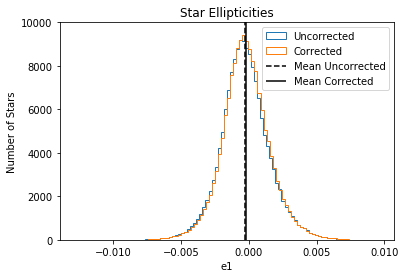

In [84]:
plt.hist(e1,histtype='step',bins=100,label='Uncorrected')
plt.hist(e1_corrected,histtype='step',bins=100,label='Corrected')
print('mean e1 uncorrected:', np.mean(e1))
print('mean e2 corrected:', np.mean(e1_corrected))
plt.vlines(np.mean(e1),ymin=0,ymax=10000,label='Mean Uncorrected',linestyles='dashed')
plt.vlines(np.mean(e1_corrected),ymin=0,ymax=10000,label='Mean Corrected')
plt.ylim(0,10000)
plt.ylabel('Number of Stars')
plt.xlabel('e1')
plt.title('Star Ellipticities')
plt.legend(loc='best')

mean e2 uncorrected: 1.5180755191782412e-05
mean e2 corrected: 1.5099644801955362e-05


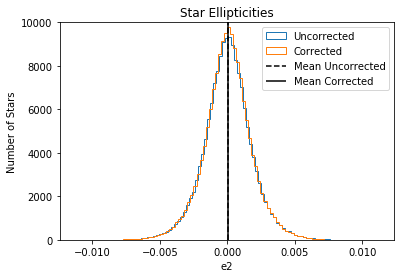

In [86]:
plt.hist(e2,histtype='step',bins=100,label='Uncorrected')
plt.hist(e2_corrected,histtype='step',bins=100,label='Corrected')
print('mean e2 uncorrected:', np.mean(e2))
print('mean e2 corrected:', np.mean(e2_corrected))
plt.vlines(np.mean(e2),ymin=0,ymax=10000,label='Mean Uncorrected',linestyles='dashed')
plt.vlines(np.mean(e2_corrected),ymin=0,ymax=10000,label='Mean Corrected')
plt.ylim(0,10000)
plt.ylabel('Number of Stars')
plt.xlabel('e2')
plt.title('Star Ellipticities')
plt.legend(loc='best')

mean e1_psf uncorrected: -0.0003025459974685459
mean e1_psf corrected: -0.0002314039777592669


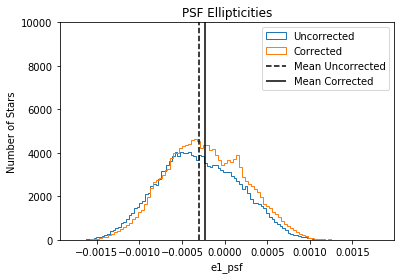

In [101]:
plt.hist(e1_psf,histtype='step',bins=100,label='Uncorrected')
plt.hist(e1_psf_corrected,histtype='step',bins=100,label='Corrected')
print('mean e1_psf uncorrected:', np.mean(e1_psf))
print('mean e1_psf corrected:', np.mean(e1_psf_corrected))
plt.vlines(np.mean(e1_psf),ymin=0,ymax=10000,label='Mean Uncorrected',linestyles='dashed')
plt.vlines(np.mean(e1_psf_corrected),ymin=0,ymax=10000,label='Mean Corrected')
plt.ylim(0,10000)
plt.ylabel('Number of Stars')
plt.xlabel('e1_psf')
plt.title('PSF Ellipticities')
plt.legend(loc='best')

mean e2_psf uncorrected: 1.52820156340793e-05
mean e2_psf corrected: 1.5187625729316444e-05


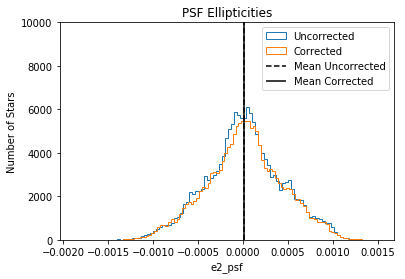

In [100]:
plt.hist(e2_psf,histtype='step',bins=100,label='Uncorrected')
plt.hist(e2_psf_corrected,histtype='step',bins=100,label='Corrected')
print('mean e2_psf uncorrected:', np.mean(e2_psf))
print('mean e2_psf corrected:', np.mean(e2_psf_corrected))
plt.vlines(np.mean(e2_psf),ymin=0,ymax=10000,label='Mean Uncorrected',linestyles='dashed')
plt.vlines(np.mean(e2_psf_corrected),ymin=0,ymax=10000,label='Mean Corrected')
plt.ylim(0,10000)
plt.ylabel('Number of Stars')
plt.xlabel('e2_psf')
plt.title('PSF Ellipticities')
plt.legend(loc='best')

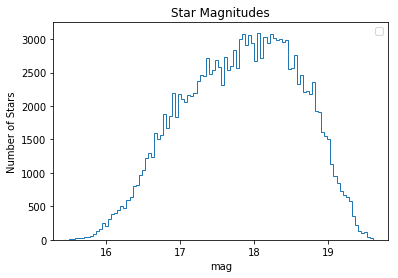

In [99]:
plt.hist(df_uncorrected['mag'],histtype='step',bins=100)
plt.ylabel('Number of Stars')
plt.xlabel('mag')
plt.title('Star Magnitudes')
plt.legend(loc='best')

In [108]:
len(e1_corrected)

159696

mean e1 uncorrected: -0.00029602757502576054
mean e1 corrected: -0.00022437001814668166


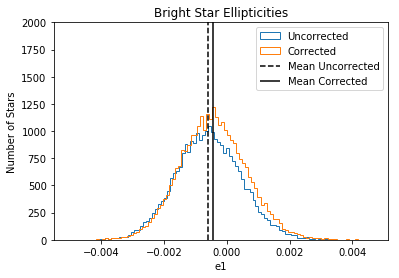

In [117]:
mag_cut = df_uncorrected['mag']<17
mag_cut_corrected = df_corrected['mag']<17
plt.hist(e1[mag_cut],histtype='step',bins=100,label='Uncorrected')
plt.hist(e1_corrected[mag_cut_corrected],histtype='step',bins=100,label='Corrected')
print('mean e1 uncorrected:', np.mean(e1))
print('mean e1 corrected:', np.mean(e1_corrected))
plt.vlines(np.mean(e1[mag_cut]),ymin=0,ymax=10000,label='Mean Uncorrected',linestyles='dashed')
plt.vlines(np.mean(e1_corrected[mag_cut_corrected]),ymin=0,ymax=10000,label='Mean Corrected')
plt.ylim(0,2000)
plt.ylabel('Number of Stars')
plt.xlabel('e1')
plt.title('Bright Star Ellipticities')
plt.legend(loc='best')

mean e2 uncorrected: 1.5180755191782412e-05
mean e2 corrected: 1.5099644801955362e-05


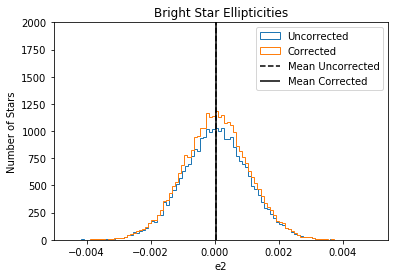

In [119]:
mag_cut = df_uncorrected['mag']<17
mag_cut_corrected = df_corrected['mag']<17
plt.hist(e2[mag_cut],histtype='step',bins=100,label='Uncorrected')
plt.hist(e2_corrected[mag_cut_corrected],histtype='step',bins=100,label='Corrected')
print('mean e2 uncorrected:', np.mean(e2))
print('mean e2 corrected:', np.mean(e2_corrected))
plt.vlines(np.mean(e2[mag_cut]),ymin=0,ymax=10000,label='Mean Uncorrected',linestyles='dashed')
plt.vlines(np.mean(e2_corrected[mag_cut_corrected]),ymin=0,ymax=10000,label='Mean Corrected')
plt.ylim(0,2000)
plt.ylabel('Number of Stars')
plt.xlabel('e2')
plt.title('Bright Star Ellipticities')
plt.legend(loc='best')

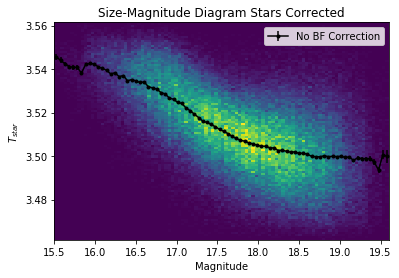

In [155]:
plt.hist2d(mag,T_star,bins=100)
plt.xlabel('Magnitude')
plt.title('Size-Magnitude Diagram Stars Corrected')
plt.ylabel('Size T=Ixx+Iyy')

binned_value, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='.',color='black',label='No BF Correction')
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
#plt.vlines(x=18.5,ymin=-0.08,ymax=0.1,label='DES SV Cut')
plt.legend(loc='best')

plt.show()

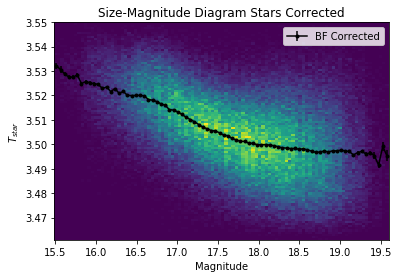

In [156]:
plt.hist2d(mag_corrected,T_star_corrected,bins=100)
plt.xlabel('Magnitude')
plt.title('Size-Magnitude Diagram Stars Corrected')
plt.ylabel('Size T=Ixx+Iyy')

binned_value, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='.',color='black',label='BF Corrected')
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
#plt.vlines(x=18.5,ymin=-0.08,ymax=0.1,label='DES SV Cut')
plt.legend(loc='best')

plt.show()

Note, we don't expect this curve to be perfectly flat, because some of the upturn is due to saturation. Need to mark the saturation point to delineate from BF.

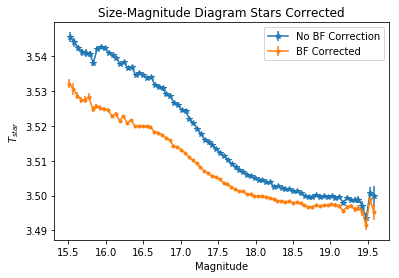

In [160]:
binned_value, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='*',label='No BF Correction')
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
#plt.vlines(x=18.5,ymin=-0.08,ymax=0.1,label='DES SV Cut')
plt.legend(loc='best')

binned_value, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='.',label='BF Corrected')
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
plt.title('Size-Magnitude Diagram Stars Corrected')
#plt.vlines(x=18.5,ymin=-0.08,ymax=0.1,label='DES SV Cut')
plt.legend(loc='best')

plt.show()


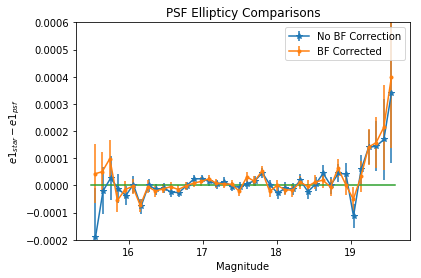

In [362]:
binned_value, binned_mag, binnumber = binned_statistic(mag, e1-e1_psf, statistic='mean', bins=40, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, e1-e1_psf, statistic='std', bins=40, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, e1-e1_psf, statistic='count', bins=40, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='*',label='No BF Correction')
plt.ylabel('$e1$')
plt.xlabel('Magnitude')
#plt.vlines(x=18.5,ymin=-0.08,ymax=0.1,label='DES SV Cut')
plt.legend(loc='best')

binned_value, binned_mag, binnumber = binned_statistic(mag_corrected, e1_corrected-e1_psf_corrected, statistic='mean', bins=40, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag_corrected, e1_corrected-e1_psf_corrected, statistic='std', bins=40, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag_corrected, e1_corrected-e1_psf_corrected, statistic='count', bins=40, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='.',label='BF Corrected')
plt.ylabel('$e1_{star}-e1_{psf}$')
plt.xlabel('Magnitude')
plt.title('PSF Ellipticy Comparisons')
#plt.vlines(x=18.5,ymin=-0.08,ymax=0.1,label='DES SV Cut')
plt.legend(loc='best')
plt.ylim(-2e-4,6e-4)
plt.plot(binned_mag,0*np.ones(len(binned_mag)))
plt.show()

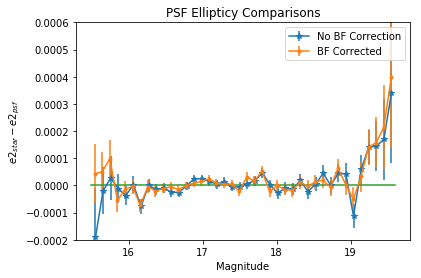

In [363]:
binned_value, binned_mag, binnumber = binned_statistic(mag, e1-e1_psf, statistic='mean', bins=40, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, e1-e1_psf, statistic='std', bins=40, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, e1-e1_psf, statistic='count', bins=40, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='*',label='No BF Correction')
plt.xlabel('Magnitude')
#plt.vlines(x=18.5,ymin=-0.08,ymax=0.1,label='DES SV Cut')
plt.legend(loc='best')

binned_value, binned_mag, binnumber = binned_statistic(mag_corrected, e1_corrected-e1_psf_corrected, statistic='mean', bins=40, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag_corrected, e1_corrected-e1_psf_corrected, statistic='std', bins=40, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag_corrected, e1_corrected-e1_psf_corrected, statistic='count', bins=40, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='.',label='BF Corrected')
plt.ylabel('$e2_{star}-e2_{psf}$')
plt.xlabel('Magnitude')
plt.title('PSF Ellipticy Comparisons')
#plt.vlines(x=18.5,ymin=-0.08,ymax=0.1,label='DES SV Cut')
plt.legend(loc='best')
plt.ylim(-2e-4,6e-4)
plt.plot(binned_mag,0*np.ones(len(binned_mag)))
plt.show()

## Rho Stats

Compute the $\rho$ statistics which are a measure of the impact of PSF errors on the correlation function.

Following __[Jarvis et al (2015)](https://ui.adsabs.harvard.edu/#abs/arXiv:1507.05603)__, we define the correction to the correlation function as

$$ \delta \xi_+(\theta) = 2 \left\langle \frac{T_{\rm PSF}}{T_{\rm gal}} \frac{\delta T_{\rm PSF}}{T_{\rm PSF}}\right\rangle \xi_+(\theta)  +  \left\langle \frac{T_{\rm PSF}}{T_{\rm gal}} \right\rangle^2 \rho_1(\theta) - \alpha  \left\langle \frac{T_{\rm PSF}}{T_{\rm gal}}\right\rangle \rho_2(\theta) +  \left\langle \frac{T_{\rm PSF}}{T_{\rm gal}} \right\rangle^2 \rho_3 (\theta) +  \left\langle \frac{T_{\rm PSF}}{T_{\rm gal}}\right\rangle^2 \rho_4(\theta) - \alpha  \left\langle \frac{T_{\rm PSF}}{T_{\rm gal}}\right\rangle \rho_5(\theta) $$

T represents the intensity-weighted second moment of the radius, called $R^2$ in an earlier paper by Paulin-Henriksson et al. (2008).  Handily for us, the ratio of T given above is what's called resolution in the reGaussianization pipeline used for shape measurement by the DM stack.  Following Jarvis et al, we'll approximate that first expectation value as the multiplication of two expectation values:

$$\left\langle \frac{T_{\rm PSF}}{T_{\rm gal}} \frac{\delta T_{\rm PSF}}{T_{\rm PSF}}\right\rangle = \left\langle \frac{T_{\rm PSF}}{T_{\rm gal}}\right\rangle \left\langle \frac{\delta T_{\rm PSF}}{T_{\rm PSF}}\right\rangle $$

since we can't measure  the PSF modeling error at the locations of galaxies, and we can't measure galaxy size at the locations of stars.

### Rho1 

Uncorrected.

In [181]:
bin_slop = 0.1
max_sep = 250
min_sep = .5
nbins = 20

cat_s = treecorr.Catalog(
        ra=ra,
        dec=dec,
        g1=e1 - e1_psf,
        g2=e2 - e2_psf,ra_units='rad',dec_units='rad')

In [185]:
%timeit
cat_s = treecorr.Catalog(
        ra=ra,
        dec=dec,
        g1=e1 - e1_psf,
        g2=e2 - e2_psf,ra_units='rad',dec_units='rad')

gg = treecorr.GGCorrelation(nbins=nbins,min_sep=min_sep,max_sep=max_sep,sep_units='arcmin',
                            bin_slop=bin_slop,verbose=True)
        
gg.process(cat_s,cat_s)

In [186]:
#NOTE: We are computing 10^6 x correlation function for easier comparison
rho1 = gg.xip 
rho1_error = np.sqrt(gg.varxi)
r_rho1=np.exp(gg.meanlogr)

Corrected.

In [206]:
cat_s = treecorr.Catalog(
        ra=ra_corrected,
        dec=dec_corrected,
        g1=e1_corrected - e1_psf_corrected,
        g2=e2_corrected - e2_psf_corrected,ra_units='rad',dec_units='rad')

In [207]:
%timeit
cat_s = treecorr.Catalog(
        ra=ra_corrected,
        dec=dec_corrected,
        g1=e1_corrected - e1_psf_corrected,
        g2=e2_corrected - e2_psf_corrected,ra_units='rad',dec_units='rad')

gg = treecorr.GGCorrelation(nbins=nbins,min_sep=min_sep,max_sep=max_sep,sep_units='arcmin',
                            bin_slop=bin_slop,verbose=True)
        
gg.process(cat_s,cat_s)

In [208]:
#NOTE: We are computing 10^6 x correlation function for easier comparison
rho1_corrected = gg.xip 
rho1_corrected_error = np.sqrt(gg.varxi)
r_corrected_rho1=np.exp(gg.meanlogr)

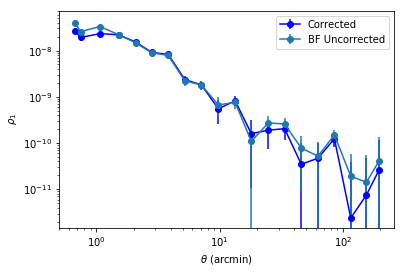

In [248]:
# Sensor scale around 13 arcmin 
plt.errorbar(r_corrected_rho1,abs(rho1_corrected),yerr=rho1_corrected_error,marker='o',color='blue',label='Corrected')
plt.errorbar(r_rho1,abs(rho1),yerr=rho1_error,marker='o',label='BF Uncorrected')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\rho_1$')
plt.xlabel(r'$\theta$ (arcmin)')
plt.legend(loc='best')

### Rho2

Uncorrected.

In [320]:
cat_s_1 = treecorr.Catalog(
        ra=ra,
        dec=dec,
        g1=e1_psf,
        g2=e2_psf,ra_units='rad',dec_units='rad')
cat_s_2 = treecorr.Catalog(
        ra=ra,
        dec=dec,
        g1=e1-e1_psf,
        g2=e2-e1_psf,ra_units='rad',dec_units='rad')

In [321]:
%%time

gg = treecorr.GGCorrelation(nbins=nbins,min_sep=min_sep,max_sep=max_sep,sep_units='arcmin',
                            bin_slop=bin_slop,verbose=True)
        
gg.process(cat_s_1,cat_s_2)

CPU times: user 49.5 s, sys: 10.9 ms, total: 49.5 s
Wall time: 27.4 s


In [322]:
rho2 = gg.xip 
rho2_error = np.sqrt(gg.varxi)
r_rho2=np.exp(gg.meanlogr)

Corrected.

In [336]:
cat_s_1 = treecorr.Catalog(
        ra=ra_corrected,
        dec=dec_corrected,
        g1=e1_psf_corrected,
        g2=e2_psf_corrected,ra_units='rad',dec_units='rad')
cat_s_2 = treecorr.Catalog(
        ra=ra_corrected,
        dec=dec_corrected,
        g1=e1_corrected-e1_psf_corrected,
        g2=e2_corrected-e2_psf_corrected,ra_units='rad',dec_units='rad')

In [337]:
gg_corrected = treecorr.GGCorrelation(nbins=nbins,min_sep=min_sep,max_sep=max_sep,sep_units='arcmin',
                            bin_slop=bin_slop,verbose=True)

In [338]:
%%time
gg_corrected.process(cat_s_1,cat_s_2)
rho2_corrected = gg_corrected.xip 
rho2_error_corrected = np.sqrt(gg_corrected.varxi)
r_rho2_corrected =np.exp(gg_corrected.meanlogr)

CPU times: user 1min 24s, sys: 77.5 ms, total: 1min 24s
Wall time: 1.62 s


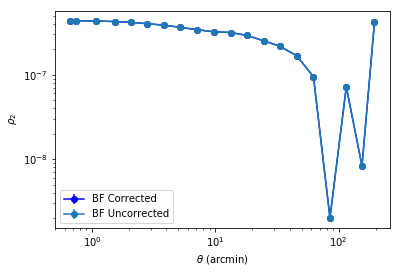

In [339]:
# Sensor scale around 13 arcmin 
plt.errorbar(r_rho2_corrected,abs(rho2_corrected),yerr=rho2_error_corrected,marker='o',color='blue',label='BF Corrected')
plt.errorbar(r_rho2,abs(rho2),yerr=rho2_error,marker='o',label='BF Uncorrected')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\rho_2$')
plt.xlabel(r'$\theta$ (arcmin)')
plt.legend(loc='best')

### Rho3

Uncorrected.

In [204]:
%%time

cat_s_1 = treecorr.Catalog(
        ra=ra,
        dec=dec,
        g1=e1_psf*((T_star-T_psf)/T_psf),
        g2=e2_psf*((T_star-T_psf)/T_psf),ra_units='rad',dec_units='rad')
cat_s_2 = treecorr.Catalog(
        ra=ra,
        dec=dec,
        g1=e1*((T_star-T_psf)/T_psf),
        g2=e2*((T_star-T_psf)/T_psf),ra_units='rad',dec_units='rad')

CPU times: user 48.7 s, sys: 0 ns, total: 48.7 s
Wall time: 27 s


In [253]:
gg = treecorr.GGCorrelation(nbins=nbins,min_sep=min_sep,max_sep=max_sep,sep_units='arcmin',
                            bin_slop=bin_slop,verbose=True)
        
gg.process(cat_s_1,cat_s_2)

In [254]:
rho3 = gg.xip 
rho3_error = np.sqrt(gg.varxi)
r_rho3=np.exp(gg.meanlogr)

Corrected

In [255]:
%%time

cat_s_1 = treecorr.Catalog(
        ra=ra_corrected,
        dec=dec_corrected,
        g1=e1_psf_corrected*((T_star_corrected-T_psf_corrected)/T_psf_corrected),
        g2=e2_psf_corrected*((T_star_corrected-T_psf_corrected)/T_psf_corrected),ra_units='rad',dec_units='rad')
cat_s_2 = treecorr.Catalog(
        ra=ra_corrected,
        dec=dec_corrected,
        g1=e1_corrected*((T_star_corrected-T_psf_corrected)/T_psf_corrected),
        g2=e2_corrected*((T_star_corrected-T_psf_corrected)/T_psf_corrected),ra_units='rad',dec_units='rad')

CPU times: user 91 ms, sys: 3.79 ms, total: 94.8 ms
Wall time: 88.1 ms


In [256]:
gg = treecorr.GGCorrelation(nbins=nbins,min_sep=min_sep,max_sep=max_sep,sep_units='arcmin',
                            bin_slop=bin_slop,verbose=True)
        
gg.process(cat_s_1,cat_s_2)

In [257]:
rho3_corrected = gg.xip 
rho3_error_corrected = np.sqrt(gg.varxi)
r_rho3_corrected =np.exp(gg.meanlogr)

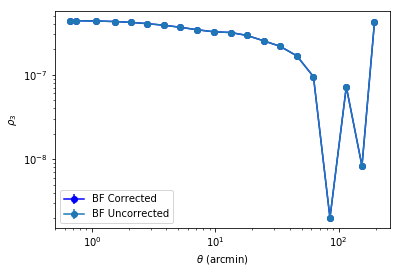

In [263]:
# Sensor scale around 13 arcmin 
plt.errorbar(r_rho3_corrected,abs(rho3_corrected),yerr=rho3_error_corrected,marker='o',color='blue',label='BF Corrected')
plt.errorbar(r_rho3,abs(rho3),yerr=rho3_error,marker='o',label='BF Uncorrected')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\rho_3$')
plt.xlabel(r'$\theta$ (arcmin)')
plt.legend(loc='best')

In [267]:
# Are the same? 
rho3_corrected

array([ 4.36011936e-07,  4.33602628e-07,  4.30951120e-07,  4.24487285e-07,
        4.14740200e-07,  4.00529297e-07,  3.84173449e-07,  3.62796157e-07,
        3.39674423e-07,  3.20916819e-07,  3.14830043e-07,  2.90926910e-07,
        2.50909296e-07,  2.16153680e-07,  1.66798937e-07,  9.45925147e-08,
       -2.02654662e-09, -7.18533023e-08,  8.32734826e-09,  4.17261585e-07])

In [268]:
rho3

array([ 4.36011936e-07,  4.33602628e-07,  4.30951120e-07,  4.24487285e-07,
        4.14740200e-07,  4.00529297e-07,  3.84173449e-07,  3.62796157e-07,
        3.39674423e-07,  3.20916819e-07,  3.14830043e-07,  2.90926910e-07,
        2.50909296e-07,  2.16153680e-07,  1.66798937e-07,  9.45925147e-08,
       -2.02654662e-09, -7.18533023e-08,  8.32734826e-09,  4.17261585e-07])

### Rho4

Uncorrected.

In [340]:
%%time

cat_s_1 = treecorr.Catalog(
        ra=ra,
        dec=dec,
        g1=(e1-e1_psf),
        g2=(e2-e2_psf),ra_units='rad',dec_units='rad')
cat_s_2 = treecorr.Catalog(
        ra=ra,
        dec=dec,
        g1=e1_psf*((T_star-T_psf)/T_psf),
        g2=e2_psf*((T_star-T_psf)/T_psf),ra_units='rad',dec_units='rad')

CPU times: user 89.8 ms, sys: 8.27 ms, total: 98.1 ms
Wall time: 93.9 ms


In [343]:
gg = treecorr.GGCorrelation(nbins=nbins,min_sep=min_sep,max_sep=max_sep,sep_units='arcmin',
                            bin_slop=bin_slop,verbose=True)

gg.process(cat_s_1,cat_s_2)

In [344]:
#NOTE: We are computing 10^6 x correlation function for easier comparison
rho4 = gg.xip 
rho4_error = np.sqrt(gg.varxi)
r_rho4=np.exp(gg.meanlogr)

Corrected.

In [346]:
%%time

cat_s_1 = treecorr.Catalog(
        ra=ra_corrected,
        dec=dec_corrected,
        g1=(e1_corrected-e1_psf_corrected),
        g2=(e2_corrected-e2_psf_corrected),ra_units='rad',dec_units='rad')
cat_s_2 = treecorr.Catalog(
        ra=ra_corrected,
        dec=dec_corrected,
        g1=e1_psf_corrected*((T_star_corrected-T_psf_corrected)/T_psf_corrected),
        g2=e2_psf_corrected*((T_star_corrected-T_psf_corrected)/T_psf_corrected),ra_units='rad',dec_units='rad')

CPU times: user 84.8 ms, sys: 8.11 ms, total: 92.9 ms
Wall time: 89.7 ms


In [347]:
gg = treecorr.GGCorrelation(nbins=nbins,min_sep=min_sep,max_sep=max_sep,sep_units='arcmin',
                            bin_slop=bin_slop,verbose=True)

gg.process(cat_s_1,cat_s_2)

In [348]:
#NOTE: We are computing 10^6 x correlation function for easier comparison
rho4_corrected = gg.xip 
rho4_error_corrected = np.sqrt(gg.varxi)
r_rho4_corrected=np.exp(gg.meanlogr)

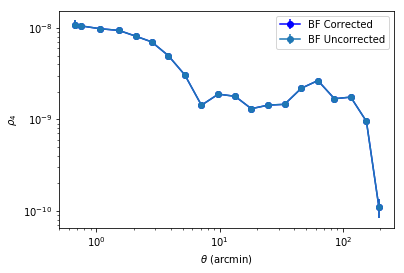

In [349]:
# Sensor scale around 13 arcmin 
plt.errorbar(r_rho4_corrected,abs(rho4_corrected),yerr=rho4_error_corrected,marker='o',color='blue',label='BF Corrected')
plt.errorbar(r_rho4,abs(rho4),yerr=rho4_error,marker='o',label='BF Uncorrected')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\rho_4$')
plt.xlabel(r'$\theta$ (arcmin)')
plt.legend(loc='best')

### Rho5

Uncorrected.

In [352]:
%%time

cat_s_1 = treecorr.Catalog(
        ra=ra,
        dec=dec,
        g1=e1_psf,
        g2=e2_psf,ra_units='rad',dec_units='rad')
cat_s_2 = treecorr.Catalog(
        ra=ra,
        dec=dec,
        g1=e1_psf*((T_star-T_psf)/T_psf),
        g2=e2_psf*((T_star-T_psf)/T_psf),ra_units='rad',dec_units='rad')

CPU times: user 84.1 ms, sys: 11.7 ms, total: 95.8 ms
Wall time: 92.8 ms


In [353]:
gg = treecorr.GGCorrelation(nbins=nbins,min_sep=min_sep,max_sep=max_sep,sep_units='arcmin',
                            bin_slop=bin_slop,verbose=True)

gg.process(cat_s_1,cat_s_2)

In [354]:
#NOTE: We are computing 10^6 x correlation function for easier comparison
rho5 = gg.xip 
rho5_error = np.sqrt(gg.varxi)
r_rho5=np.exp(gg.meanlogr)

Corrected.

In [355]:
%%time

cat_s_1 = treecorr.Catalog(
        ra=ra_corrected,
        dec=dec_corrected,
        g1=e1_psf_corrected,
        g2=e2_psf_corrected,ra_units='rad',dec_units='rad')
cat_s_2 = treecorr.Catalog(
        ra=ra_corrected,
        dec=dec_corrected,
        g1=e1_psf_corrected*((T_star_corrected-T_psf_corrected)/T_psf_corrected),
        g2=e2_psf_corrected*((T_star_corrected-T_psf_corrected)/T_psf_corrected),ra_units='rad',dec_units='rad')

CPU times: user 86.7 ms, sys: 3.85 ms, total: 90.5 ms
Wall time: 87.3 ms


In [356]:
gg = treecorr.GGCorrelation(nbins=nbins,min_sep=min_sep,max_sep=max_sep,sep_units='arcmin',
                            bin_slop=bin_slop,verbose=True)

gg.process(cat_s_1,cat_s_2)

In [357]:
#NOTE: We are computing 10^6 x correlation function for easier comparison
rho5_corrected = gg.xip 
rho5_error_corrected = np.sqrt(gg.varxi)
r_rho5_corrected =np.exp(gg.meanlogr)

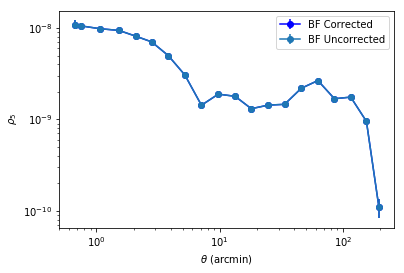

In [358]:
# Sensor scale around 13 arcmin 
plt.errorbar(r_rho5_corrected,abs(rho5_corrected),yerr=rho5_error_corrected,marker='o',color='blue',label='BF Corrected')
plt.errorbar(r_rho5,abs(rho5),yerr=rho5_error,marker='o',label='BF Uncorrected')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\rho_5$')
plt.xlabel(r'$\theta$ (arcmin)')
plt.legend(loc='best')

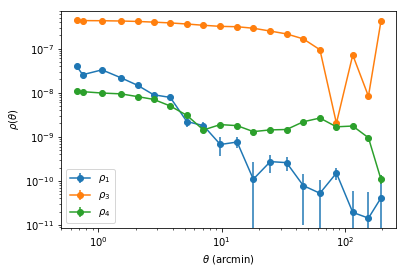

In [359]:
# Sensor scale around 13 arcmin 
plt.errorbar(r_rho1,abs(rho1),yerr=rho1_error,marker='o',label=r'$\rho_1$')
plt.errorbar(r_rho3,abs(rho3),yerr=rho3_error,marker='o',label=r'$\rho_3$')
plt.errorbar(r_rho4,abs(rho4),yerr=rho4_error,marker='o',label=r'$\rho_4$')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\rho (\theta)$')
plt.xlabel(r'$\theta$ (arcmin)')
plt.legend(loc='best')

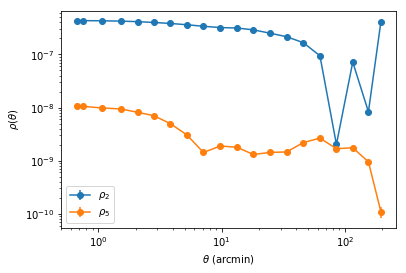

In [360]:
# Sensor scale around 13 arcmin 
plt.errorbar(r_rho2,abs(rho2),yerr=rho2_error,marker='o',label=r'$\rho_2$')
plt.errorbar(r_rho5,abs(rho5),yerr=rho5_error,marker='o',label=r'$\rho_5$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\rho (\theta)$')
plt.xlabel(r'$\theta$ (arcmin)')
plt.legend(loc='best')